In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm 


In [2]:
import tensorflow as tf

In [3]:
dataset = ".\Brain"

categories = ["Anomaly", "Normal"]

In [4]:
import os

In [5]:
#show one image and its height widtht 
for category in categories:
    path = os.path.join(dataset,category)
    #print(path)
    class_num = category.index(category) 
    print(class_num)
    print("class\t"+str(class_num))
    for image in os.listdir(path):
        print("image file name\t"+str(image))
        #image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        #print(image_array.shape)
        #plt.imshow(image_array, cmap='gray') 
        plt.show()
        break
    break

0
class	0
image file name	xyz_a2779_35b.jpg


In [7]:
# IMG_SIZE = 28

# new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap='gray')

# plt.show()
# new_array.shape

In [8]:
training_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(dataset,category) 
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                #print(np.array(new_array).shape)
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass




In [10]:
create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:03<00:00, 45.42it/s]


In [11]:
training_data[:1][0][0].shape

(28, 28)

In [12]:
import random
random.shuffle(training_data)


In [13]:
X = []
y = []

for data in training_data:
    X.append(data[0])
    y.append(data[1])
# print(y)
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X)
X=X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
# # X.max()
# # X.shape
X = np.array(X)
# X.shape
X.shape

(209, 28, 28, 1)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
X.shape

(209, 28, 28, 1)

In [18]:
Y=np.array(y)

In [19]:
X = X/255.0

In [25]:
shape_of_x=X.shape

In [28]:
X=X.reshape(shape_of_x[0],shape_of_x[1],shape_of_x[2])

In [35]:
Y=Y.reshape(-1,1)

In [20]:
# X_flatten = X.reshape( -1,X.shape[0]).T 
# y_flatten=Y.reshape(Y.shape[0],-1)

In [36]:
# X_flatten.shape,y_flatten.shape

In [150]:
# y_flatten.shape

In [37]:
# X_flatten.shape

In [50]:
# single_image = X_flatten[1].reshape(28,28) 
# plt.imshow(single_image,cmap="gray")
# plt.show()

In [38]:
# plt.imshow(X_flatten[1].reshape(784,1),cmap='gist_gray',aspect=0.02)
# plt.show()

In [39]:
# # X_flatten.shape
# y_flatten.shape

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [43]:
model=models.Sequential()
model.add(layers.Flatten( input_shape=(28,28)))
# Hidden - Layers

model.add(layers.Dense(50, activation = "relu"))

model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 41,851
Trainable params: 41,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [49]:
history=model.fit(X,Y,epochs= 100)

Epoch 1/100
209/209 [==============================] - ETA: 0s - loss: 0.3196 - acc: 0.968 - 0s 129us/step - loss: 0.3284 - acc: 0.9043
Epoch 2/100
209/209 [==============================] - ETA: 0s - loss: 0.3192 - acc: 0.937 - 0s 143us/step - loss: 0.3108 - acc: 0.9187
Epoch 3/100
209/209 [==============================] - ETA: 0s - loss: 0.3451 - acc: 0.843 - 0s 109us/step - loss: 0.2991 - acc: 0.8995
Epoch 4/100
209/209 [==============================] - ETA: 0s - loss: 0.2542 - acc: 0.968 - 0s 104us/step - loss: 0.2827 - acc: 0.9234
Epoch 5/100
209/209 [==============================] - ETA: 0s - loss: 0.3165 - acc: 0.906 - 0s 114us/step - loss: 0.3005 - acc: 0.9187
Epoch 6/100
209/209 [==============================] - ETA: 0s - loss: 0.3033 - acc: 0.875 - 0s 113us/step - loss: 0.2726 - acc: 0.9378
Epoch 7/100
209/209 [==============================] - ETA: 0s - loss: 0.2562 - acc: 0.875 - 0s 157us/step - loss: 0.2661 - acc: 0.9187
Epoch 8/100
209/209 [===========================

Epoch 61/100
209/209 [==============================] - ETA: 0s - loss: 0.0078 - acc: 1.000 - 0s 110us/step - loss: 0.0075 - acc: 1.0000
Epoch 62/100
209/209 [==============================] - ETA: 0s - loss: 0.0058 - acc: 1.000 - 0s 134us/step - loss: 0.0073 - acc: 1.0000
Epoch 63/100
209/209 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.000 - 0s 143us/step - loss: 0.0070 - acc: 1.0000
Epoch 64/100
209/209 [==============================] - ETA: 0s - loss: 0.0119 - acc: 1.000 - 0s 129us/step - loss: 0.0067 - acc: 1.0000
Epoch 65/100
209/209 [==============================] - ETA: 0s - loss: 0.0075 - acc: 1.000 - 0s 119us/step - loss: 0.0067 - acc: 1.0000
Epoch 66/100
209/209 [==============================] - ETA: 0s - loss: 0.0103 - acc: 1.000 - 0s 143us/step - loss: 0.0066 - acc: 1.0000
Epoch 67/100
209/209 [==============================] - ETA: 0s - loss: 0.0047 - acc: 1.000 - 0s 138us/step - loss: 0.0064 - acc: 1.0000
Epoch 68/100
209/209 [===================

In [124]:
history.history

{'acc': [0.9043062203808835,
  0.9186602873665294,
  0.8995215322412372,
  0.9234449769321241,
  0.9186602873665294,
  0.9377990433473906,
  0.9186602876517191,
  0.933014354637365,
  0.9282296650717703,
  0.9521531103330366,
  0.9617224888938466,
  0.9377990433473906,
  0.9521531100478469,
  0.9712918660287081,
  0.9665071770334929,
  0.9569377990430622,
  0.9856459330143541,
  0.9808612443043284,
  0.9904306220095693,
  0.9952153110047847,
  0.9904306220095693,
  1.0,
  0.9856459335847334,
  0.9904306220095693,
  0.9904306220095693,
  0.9856459332995438,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9952153110047847,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  

(28, 28)
the fatal brain is anomaly


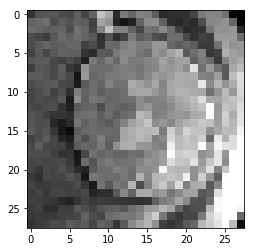

In [115]:
anomaly="./Brain/Anomaly/xyz_a2779_35c.jpg"
normal="./Brain/Normal/xyz_a8458_16a.jpg"
image_array=cv2.imread(anomaly,cv2.IMREAD_GRAYSCALE)
       
IMG_SIZE=28
new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray') 
print(new_array.shape)
#plt.show()
new_array=new_array/255  
new_array=new_array.reshape(1,new_array.shape[0],new_array.shape[1])
# print(model.predict_classes(new_array)[0][0])
if model.predict_classes(new_array)[0][0]==0:
    print("the fatal brain is anomaly")
else:
    print("the fatal brain is normal condition")

array([[0]])

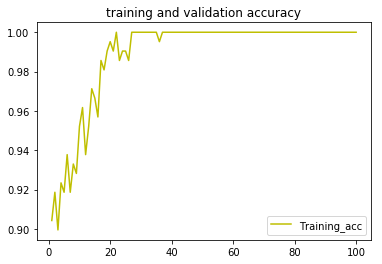

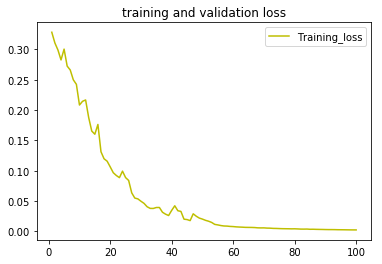

In [116]:
import matplotlib.pyplot as plt
acc=history.history["acc"]
#val_acc=history.history["val_acc"]
loss=history.history["loss"]
#val_loss=history.history["val_loss"]
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"y",label="Training_acc")
#plt.plot(epochs,val_acc,'b',label="validation_acc")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"y",label="Training_loss")
#plt.plot(epochs,val_loss,'b',label="validation_loss")
plt.title("training and validation loss")
plt.legend()
plt.show()

In [123]:
# serialize model to JSON
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [120]:
#hey this is vinoht 